In [1]:
import seaborn as sns
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import soundfile
import librosa

from src.utils.fileutils import get_project_root
from src.efficientat.windowed_inference import EATagger
root = get_project_root()
filepath = os.path.join(root, 'data/raw/maestro_ds/development_audio/city_center/city_center_11.wav')

In [2]:
filepath

'c:\\users\\blake\\pycharmprojects\\dominant-sound\\data/raw/maestro_ds/development_audio/city_center/city_center_11.wav'

In [3]:
models = ['mn10_as', 'mn10_as_hop_5', 'mn10_as_hop_15', 'mn10_as_mels_64', 'mn10_as_mels_256']

In [4]:
win_sizes = [0.25, 0.5, 1, 2, 4]
hop_lengths = [0.25, 0.5, 1]

grid = []
for i in win_sizes:
    for n in hop_lengths:
        if n <= i:
            grid.append((i, n))

In [5]:
results = []
for m in models:

    model = EATagger(model_name=m, device='cpu')
    
    for conf in grid:
        win = conf[0]
        hop = conf[1]
    
        start = time.time()
        tags = model.tag_audio_window(audio_path=filepath, window_size=win, hop_length=hop)
        end = time.time()
        tot_time = end - start
        
        top_probs = []
        for n in range(len(tags)):
            sub_tot = 0
            for i in tags[n]['tags']:
                sub_tot += i['probability']
                top_probs.append(sub_tot)
        
        prob_mean = np.asarray(top_probs).mean()
        
        print(f'Model: {m}\nWin: {win}, Hop: {hop}\nTime: {tot_time}\nMean top probs: {prob_mean}\n')
            
        result = (m, win, hop, tot_time, prob_mean)
        
        results.append(result)
    

C:\Users\Blake\PycharmProjects\dominant-sound\venv\lib\site-packages\torchvision\ops\misc.py:120: UserWarning: Don't use ConvNormActivation directly, please use Conv2dNormActivation and Conv3dNormActivation instead.
  warnings.warn(


Progress: 968/968
Model: mn10_as
Win: 0.25, Hop: 0.25
Time: 28.658798217773438
Mean top probs: 5.5
Progress: 967/967
Model: mn10_as
Win: 0.5, Hop: 0.25
Time: 30.31049609184265
Mean top probs: 5.5
Progress: 484/484
Model: mn10_as
Win: 0.5, Hop: 0.5
Time: 21.767444610595703
Mean top probs: 5.5
Progress: 965/965
Model: mn10_as
Win: 1, Hop: 0.25
Time: 40.01823878288269
Mean top probs: 5.5
Progress: 483/483
Model: mn10_as
Win: 1, Hop: 0.5
Time: 25.977570295333862
Mean top probs: 5.5
Progress: 242/242
Model: mn10_as
Win: 1, Hop: 1
Time: 18.476396560668945
Mean top probs: 5.5
Progress: 961/961
Model: mn10_as
Win: 2, Hop: 0.25
Time: 52.41848134994507
Mean top probs: 5.5
Progress: 481/481
Model: mn10_as
Win: 2, Hop: 0.5
Time: 37.890668630599976
Mean top probs: 5.5
Progress: 241/241
Model: mn10_as
Win: 2, Hop: 1
Time: 39.81200170516968
Mean top probs: 5.5
Progress: 953/953
Model: mn10_as
Win: 4, Hop: 0.25
Time: 76.95789527893066
Mean top probs: 0.6849445101166884
Progress: 477/477
Model: mn10_as

C:\Users\Blake\PycharmProjects\dominant-sound\venv\lib\site-packages\torchvision\ops\misc.py:120: UserWarning: Don't use ConvNormActivation directly, please use Conv2dNormActivation and Conv3dNormActivation instead.
  warnings.warn(


Progress: 968/968
Model: mn10_as_hop_5
Win: 0.25, Hop: 0.25
Time: 43.61530351638794
Mean top probs: 0.11039435396570665
Progress: 967/967
Model: mn10_as_hop_5
Win: 0.5, Hop: 0.25
Time: 40.54390859603882
Mean top probs: 0.21350692217373082
Progress: 484/484
Model: mn10_as_hop_5
Win: 0.5, Hop: 0.5
Time: 26.37705159187317
Mean top probs: 0.21352467782533735
Progress: 965/965
Model: mn10_as_hop_5
Win: 1, Hop: 0.25
Time: 44.38918161392212
Mean top probs: 0.19873877128856401
Progress: 483/483
Model: mn10_as_hop_5
Win: 1, Hop: 0.5
Time: 33.32000660896301
Mean top probs: 0.20524477083477005
Progress: 242/242
Model: mn10_as_hop_5
Win: 1, Hop: 1
Time: 21.384368896484375
Mean top probs: 0.21708145334908724
Progress: 961/961
Model: mn10_as_hop_5
Win: 2, Hop: 0.25
Time: 58.798954248428345
Mean top probs: 0.35272522865916706
Progress: 481/481
Model: mn10_as_hop_5
Win: 2, Hop: 0.5
Time: 34.60582160949707
Mean top probs: 0.3568234829880731
Progress: 241/241
Model: mn10_as_hop_5
Win: 2, Hop: 1
Time: 24

Downloading: "https://github.com/fschmid56/EfficientAT/releases/download/v0.0.1/mn10_as_mels_64_mAP_461.pt" to resources\mn10_as_mels_64_mAP_461.pt


  0%|          | 0.00/18.8M [00:00<?, ?B/s]

Progress: 968/968
Model: mn10_as_mels_64
Win: 0.25, Hop: 0.25
Time: 35.5904061794281
Mean top probs: 5.5
Progress: 967/967
Model: mn10_as_mels_64
Win: 0.5, Hop: 0.25
Time: 36.76971507072449
Mean top probs: 5.497613302856345
Progress: 484/484
Model: mn10_as_mels_64
Win: 0.5, Hop: 0.5
Time: 25.297845363616943
Mean top probs: 5.497058228237077
Progress: 965/965
Model: mn10_as_mels_64
Win: 1, Hop: 0.25
Time: 41.658584117889404
Mean top probs: 5.4999999992217425
Progress: 483/483
Model: mn10_as_mels_64
Win: 1, Hop: 0.5
Time: 26.487541913986206
Mean top probs: 5.49999999925957
Progress: 242/242
Model: mn10_as_mels_64
Win: 1, Hop: 1
Time: 19.39556074142456
Mean top probs: 5.4999999990148
Progress: 961/961
Model: mn10_as_mels_64
Win: 2, Hop: 0.25
Time: 57.1489531993866
Mean top probs: 3.9904117667084242
Progress: 481/481
Model: mn10_as_mels_64
Win: 2, Hop: 0.5
Time: 35.28334975242615
Mean top probs: 4.000772406747894
Progress: 241/241
Model: mn10_as_mels_64
Win: 2, Hop: 1
Time: 23.472739458084

Downloading: "https://github.com/fschmid56/EfficientAT/releases/download/v0.0.1/mn10_as_mels_256_mAP_474.pt" to resources\mn10_as_mels_256_mAP_474.pt


  0%|          | 0.00/18.8M [00:00<?, ?B/s]

Progress: 968/968
Model: mn10_as_mels_256
Win: 0.25, Hop: 0.25
Time: 33.98177766799927
Mean top probs: 0.42786866714321614
Progress: 967/967
Model: mn10_as_mels_256
Win: 0.5, Hop: 0.25
Time: 37.64195728302002
Mean top probs: 0.2890045373719821
Progress: 484/484
Model: mn10_as_mels_256
Win: 0.5, Hop: 0.5
Time: 23.430028200149536
Mean top probs: 0.2955277320430499
Progress: 965/965
Model: mn10_as_mels_256
Win: 1, Hop: 0.25
Time: 43.54114484786987
Mean top probs: 0.24374589158815615
Progress: 483/483
Model: mn10_as_mels_256
Win: 1, Hop: 0.5
Time: 25.478269815444946
Mean top probs: 0.2439977979910315
Progress: 242/242
Model: mn10_as_mels_256
Win: 1, Hop: 1
Time: 19.299121618270874
Mean top probs: 0.24629851078733894
Progress: 961/961
Model: mn10_as_mels_256
Win: 2, Hop: 0.25
Time: 54.990803718566895
Mean top probs: 0.2705122873243759
Progress: 481/481
Model: mn10_as_mels_256
Win: 2, Hop: 0.5
Time: 33.53395485877991
Mean top probs: 0.2702737779054489
Progress: 241/241
Model: mn10_as_mels_25

In [8]:
df = pd.DataFrame(results)

In [10]:
df = df.rename(columns={0:'model', 1:'win', 2:'hop', 3:'time', 4:'probs'})

In [11]:
df.head()

,model,win,hop,time,probs
0,mn10_as,0.25,0.25,28.658798,5.5
1,mn10_as,0.50,0.25,30.310496,5.5
2,mn10_as,0.50,0.50,21.767445,5.5
3,mn10_as,1.00,0.25,40.018239,5.5
4,mn10_as,1.00,0.50,25.977570,5.5


In [40]:
# restrict the following results to window sizes of 1 second or less
sec = df[df['win'] <= 1].reset_index(drop=True)

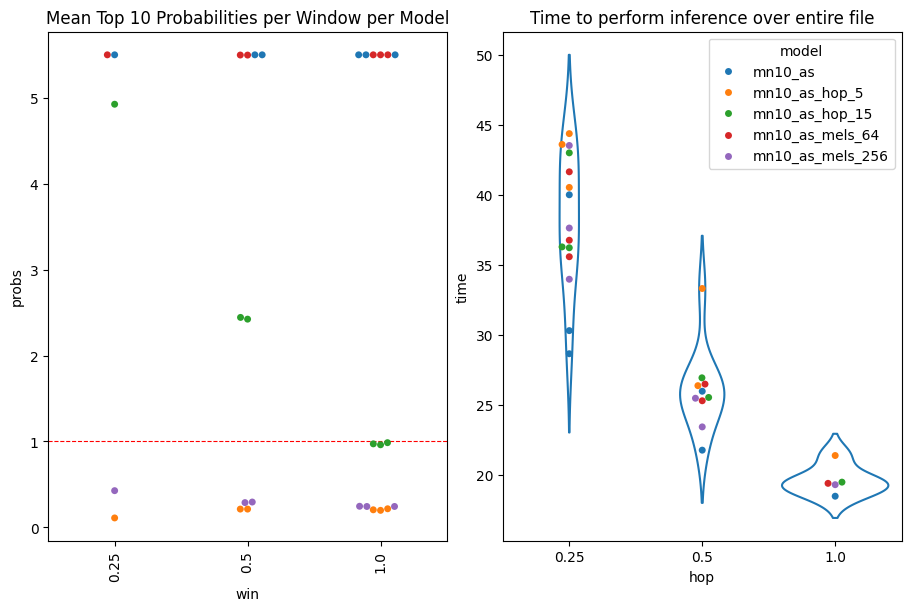

In [47]:
fig = plt.figure(figsize=(9,6), constrained_layout=True)

#first row, first column
ax1 = plt.subplot2grid((1,2),(0,0))
sns.swarmplot(data=sec, y='probs', x='win', hue='model', legend=None)
plt.axhline(y=1, color='red', ls='--', linewidth=0.8)
plt.xticks(rotation=90)
plt.title('Mean Top 10 Probabilities per Window per Model')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.violinplot(data=sec, y='time', x='hop', fill=False, inner=None)
sns.swarmplot(data=sec, y='time', x='hop', hue='model')
plt.title('Time to perform inference over entire file')

plt.show()